# Population dynamics of `AsmEnv`
---

In this notebook we explore the population dynamics of `AsmEnv`. The model has 20 age classes,
where babies (ie. age class 0) are produced according to a Beverton-Holt model with a strong
noise process dominated by infrequent large-recruitment events.

## Setup

In [2]:
# pip install -e ..

In [1]:
from rl4fisheries import AsmEnv
import pandas as pd
from plotnine import ggplot, geom_line, facet_wrap, theme, aes

## Fn to generate timeseries data for the model

In [278]:
def pop_dyn(env, action = -1):
    env.reset()
    pop_df = pd.DataFrame()
    tot_df = pd.DataFrame()
    for t in range(100):
        pop_at_t = pd.DataFrame({
            'size_distribution': env.state / sum(env.state),
            'size_class': list(range(env.parameters['n_age'])),
            't': t,
            'label': f't={t}'
        })
        tot_at_t = pd.DataFrame({
            't': [t],
            'total': [sum(env.state)],
            'surv_vul': [env.surv_vul_n],
            'newborns': [env.state[0]]
        })
        if t % 8 == 0:
            pop_df = pd.concat([pop_df, pop_at_t], ignore_index=True)
        tot_df = pd.concat([tot_df, tot_at_t], ignore_index=True)
        env.step(action)
    return pop_df, tot_df

## Natural dynamics

Here we explore the dynamics of the system when no action is taken on it (ie. when no fishing occurs).
The following plot shows timeseries data for the total fish population (`total`), the fraction of that population
which may be detected using surveys (`surv_vul`), and the number of recruits born each year (`newborns`)

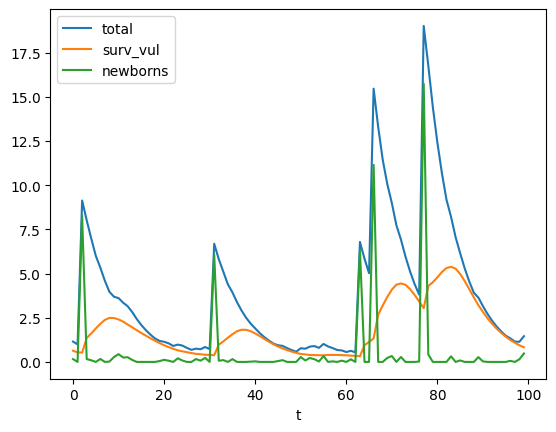

In [279]:
asm = AsmEnv()

pop_df, tot_df = pop_dyn(asm, action=-1)
import matplotlib.pyplot as plt
tot_df.plot(x='t')
plt.show()
plt.close()

Let us now look into the size structure of this time evolution. 
We will plot the relative size distribution (ie. normalized by
the total population) as a function of time. The label of the
plots is `t` (for visualization ease, we show only every eigth
year).

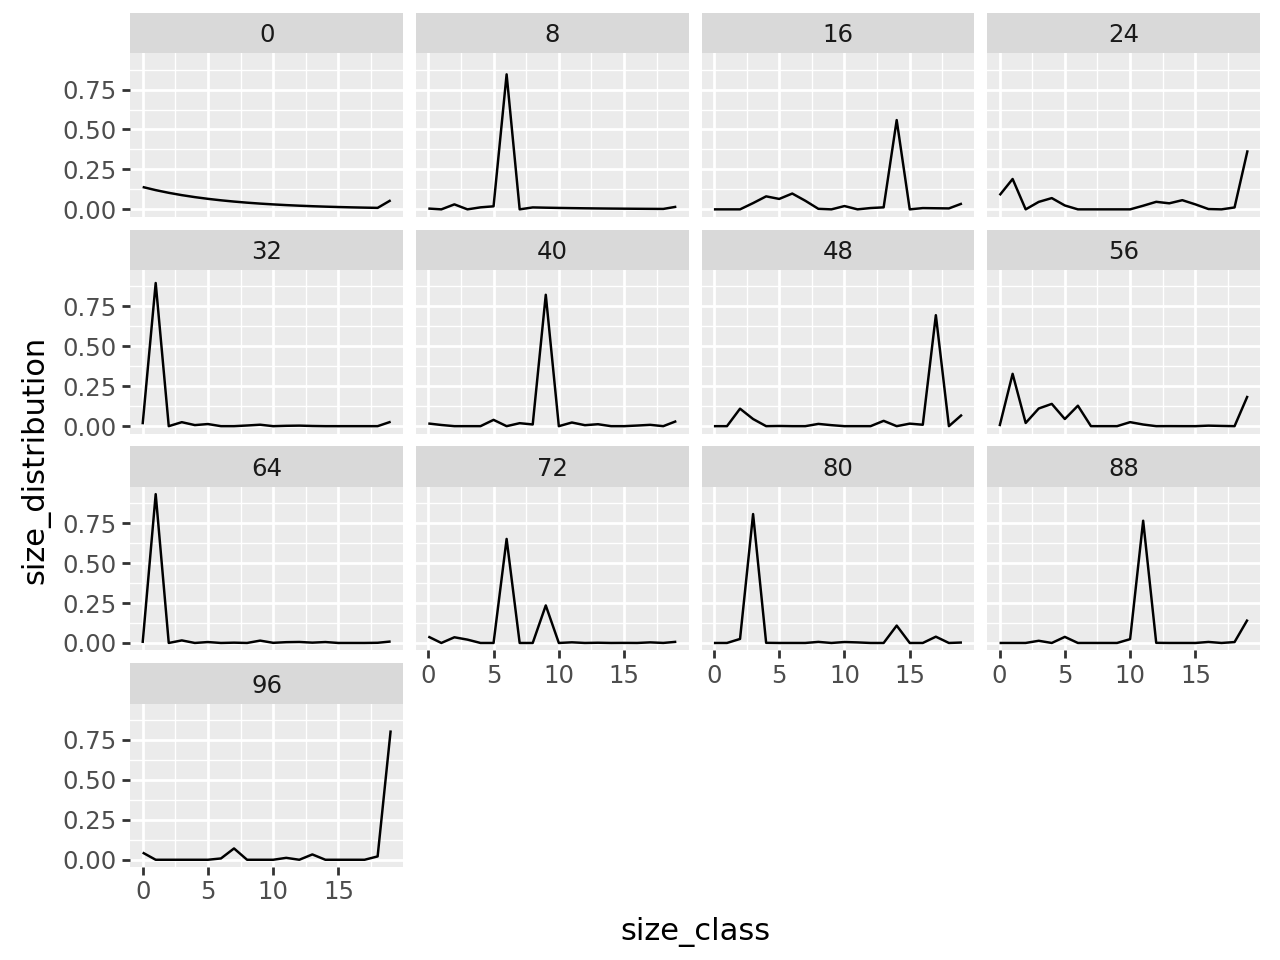

In [281]:
(
    ggplot(pop_df, aes(x='size_class',y='size_distribution')) 
    + geom_line() 
    + facet_wrap(facets='t',) 
    # + labs(title=f"N. traps = 0, final pop = {sum(gce.state):.0f}")
    + theme(aspect_ratio=0.6)
)

## Dynamics subject to fishing

For reproducibility we use the same 'deviations' (ie. the same recruitment noise timeline) `asm.r_devs`.

In [297]:
def pop_dyn_counterfactual(env, r_devs, action = -1):
    env.reset()
    env.r_devs = r_devs
    pop_df = pd.DataFrame()
    tot_df = pd.DataFrame()
    for t in range(100):
        pop_at_t = pd.DataFrame({
            'size_distribution': env.state / sum(env.state),
            'size_class': list(range(env.parameters['n_age'])),
            't': t,
            'label': f't={t}'
        })
        tot_at_t = pd.DataFrame({
            't': [t],
            'total': [sum(env.state)],
            'surv_vul': [env.surv_vul_n],
            'newborns': [env.state[0]]
        })
        if t % 8 == 0:
            pop_df = pd.concat([pop_df, pop_at_t], ignore_index=True)
        tot_df = pd.concat([tot_df, tot_at_t], ignore_index=True)
        env.step(action)
    return pop_df, tot_df

In [310]:
from rl4fisheries.envs.asm_fns import get_r_devs
RDEVS = get_r_devs(n_year=asm.n_year)

No fishing baseline:

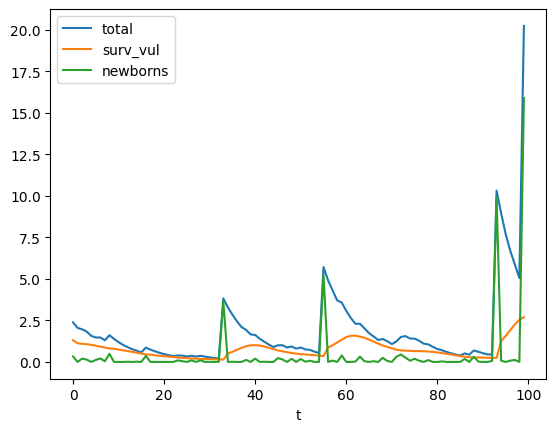

In [320]:
asm = AsmEnv()

pop_df, tot_df = pop_dyn_counterfactual(asm, RDEVS, action=-1)
tot_df.plot(x='t')
plt.show()
plt.close()

A constant fishing mortality of 5%:

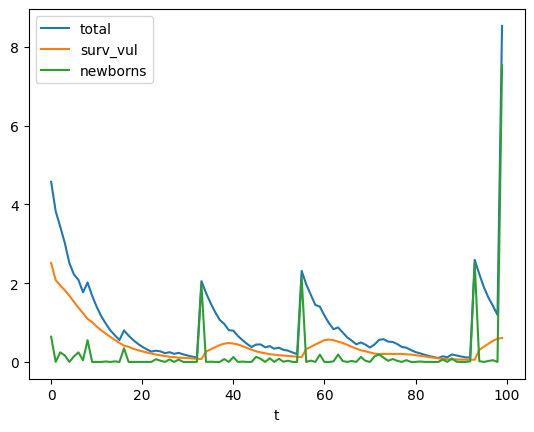

In [321]:
asm = AsmEnv()

pop_df, tot_df = pop_dyn_counterfactual(asm, RDEVS, action=-0.9)
tot_df.plot(x='t')
plt.show()
plt.close()

Constant fishing mortality of 10%:

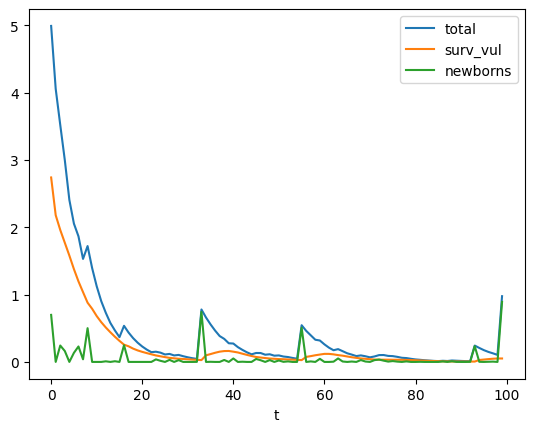

In [325]:
pop_df, tot_df = pop_dyn_counterfactual(asm, RDEVS, action=-0.8)
tot_df.plot(x='t')
plt.show()
plt.close()

Constant fishing mortality of 20%:

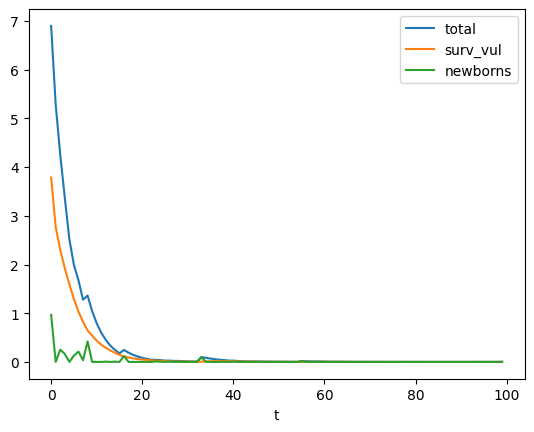

In [323]:
pop_df, tot_df = pop_dyn_counterfactual(asm, RDEVS, action=-0.6)
tot_df.plot(x='t')
plt.show()
plt.close()

Constant fishing mortality of 30%:

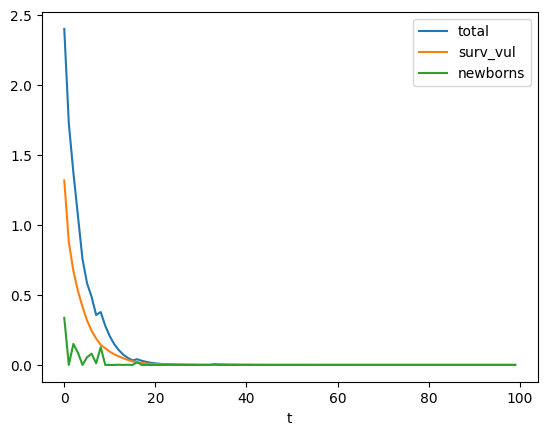

In [315]:
pop_df, tot_df = pop_dyn_counterfactual(asm, RDEVS, action=-0.4)
tot_df.plot(x='t')
plt.show()
plt.close()